In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("respondents_loan_access.csv")
data.head()

,COMID,zone_id,state_id,sector,COMM_RESP__id,gender,age,years_lived_in_community,level_of_education,phone_access,loan_source,collateral,women_access
0,COM0001918,South West,OSUN,Urban,2,MALE,56,5.0,SENIOR SECONDARY,Yes,cooperatives,NO,YES
1,COM0001918,South West,OSUN,Urban,7,FEMALE,45,7.0,PRIMARY,Yes,cooperatives,NO,YES
2,COM0001918,South West,OSUN,Urban,6,MALE,50,8.0,SENIOR SECONDARY,Yes,cooperatives,NO,YES
3,COM0001918,South West,OSUN,Urban,3,FEMALE,35,8.0,SENIOR SECONDARY,Yes,cooperatives,NO,YES
4,COM0001918,South West,OSUN,Urban,4,MALE,60,18.0,JUNIOR SECONDARY,Yes,cooperatives,NO,YES


In [3]:
other_samples = data[data["loan_source"] == "other"]
data.drop(other_samples.index, inplace=True)

In [4]:
data["loan_source"].value_counts()

informal savings groups (esusu, adashi, etc)    99035
moneylenders                                    57598
cooperatives                                    45797
formal banks                                    20823
Name: loan_source, dtype: int64

In [5]:
data['creditworthy'] = data['loan_source'].apply(lambda x: 'Yes' if x == 'formal banks' else 'No')

In [6]:
data.head()

,COMID,zone_id,state_id,sector,COMM_RESP__id,gender,age,years_lived_in_community,level_of_education,phone_access,loan_source,collateral,women_access,creditworthy
0,COM0001918,South West,OSUN,Urban,2,MALE,56,5.0,SENIOR SECONDARY,Yes,cooperatives,NO,YES,No
1,COM0001918,South West,OSUN,Urban,7,FEMALE,45,7.0,PRIMARY,Yes,cooperatives,NO,YES,No
2,COM0001918,South West,OSUN,Urban,6,MALE,50,8.0,SENIOR SECONDARY,Yes,cooperatives,NO,YES,No
3,COM0001918,South West,OSUN,Urban,3,FEMALE,35,8.0,SENIOR SECONDARY,Yes,cooperatives,NO,YES,No
4,COM0001918,South West,OSUN,Urban,4,MALE,60,18.0,JUNIOR SECONDARY,Yes,cooperatives,NO,YES,No


In [7]:
data["creditworthy"].value_counts()

No     202430
Yes     20823
Name: creditworthy, dtype: int64

In [8]:
creditworthy_yes = data[data['creditworthy'] == 'Yes']
creditworthy_no = data[data['creditworthy'] == 'No']

# Undersample the 'No' class
creditworthy_no_sampled = creditworthy_no.sample(n=len(creditworthy_yes), random_state=42)

# Concatenate to get the balanced DataFrame
balanced_df = pd.concat([creditworthy_yes, creditworthy_no_sampled])

# (Optional) Shuffle the result
data = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
data["creditworthy"].value_counts()

No     20823
Yes    20823
Name: creditworthy, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41646 entries, 0 to 41645
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   COMID                     41646 non-null  object 
 1   zone_id                   41646 non-null  object 
 2   state_id                  41646 non-null  object 
 3   sector                    41646 non-null  object 
 4   COMM_RESP__id             41646 non-null  int64  
 5   gender                    41646 non-null  object 
 6   age                       41646 non-null  int64  
 7   years_lived_in_community  41646 non-null  float64
 8   level_of_education        41646 non-null  object 
 9   phone_access              41646 non-null  object 
 10  loan_source               41646 non-null  object 
 11  collateral                41646 non-null  object 
 12  women_access              41646 non-null  object 
 13  creditworthy              41646 non-null  object 
dtypes: flo

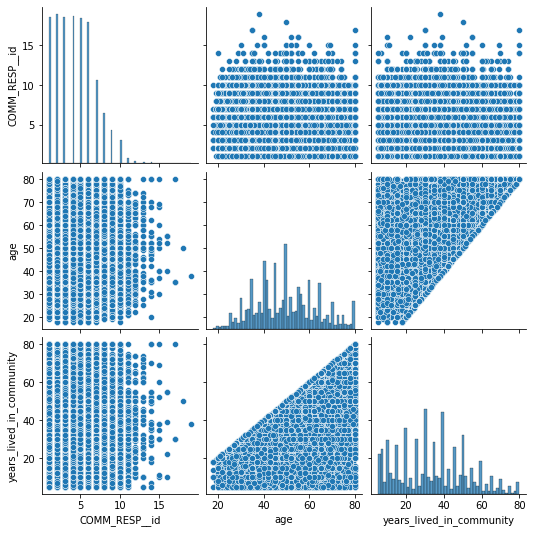

In [11]:
sns.pairplot(data)

<AxesSubplot:xlabel='loan_source', ylabel='count'>

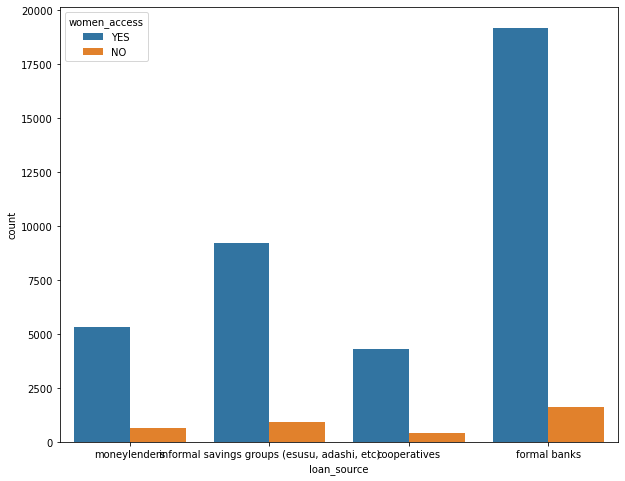

In [12]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'loan_source', hue = 'women_access', data = data)

<AxesSubplot:xlabel='count', ylabel='zone_id'>

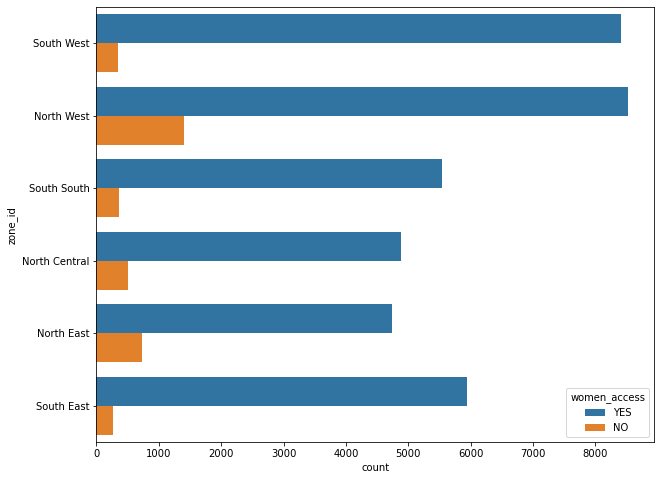

In [13]:
plt.figure(figsize = (10,8))
sns.countplot(y = 'zone_id',  hue = 'women_access', data = data)

In [14]:
#pip install xgboost

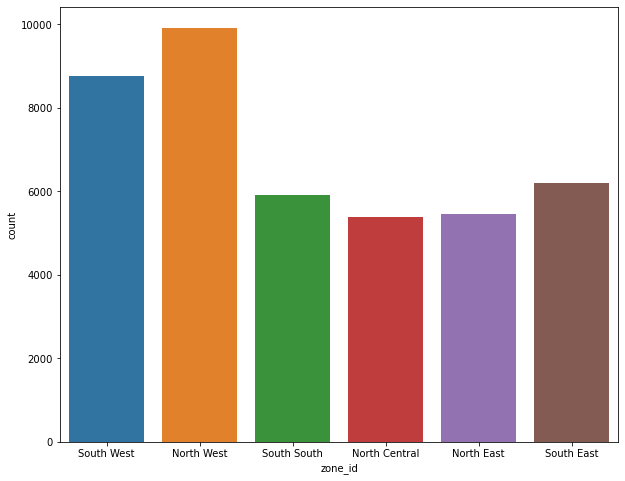

In [15]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'zone_id', data = data)
plt.show()

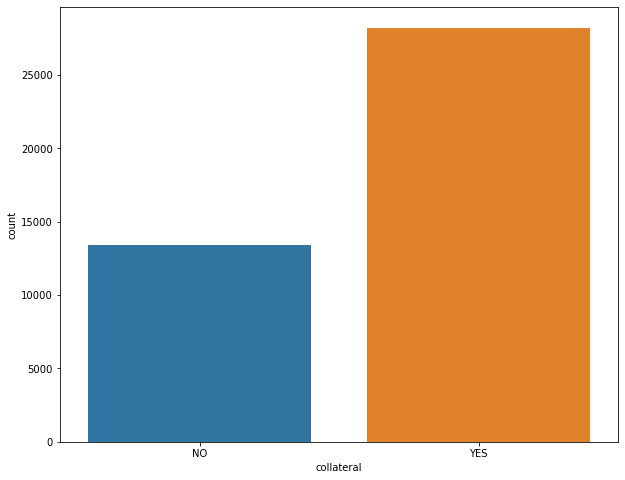

In [16]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'collateral', data = data)
plt.show()

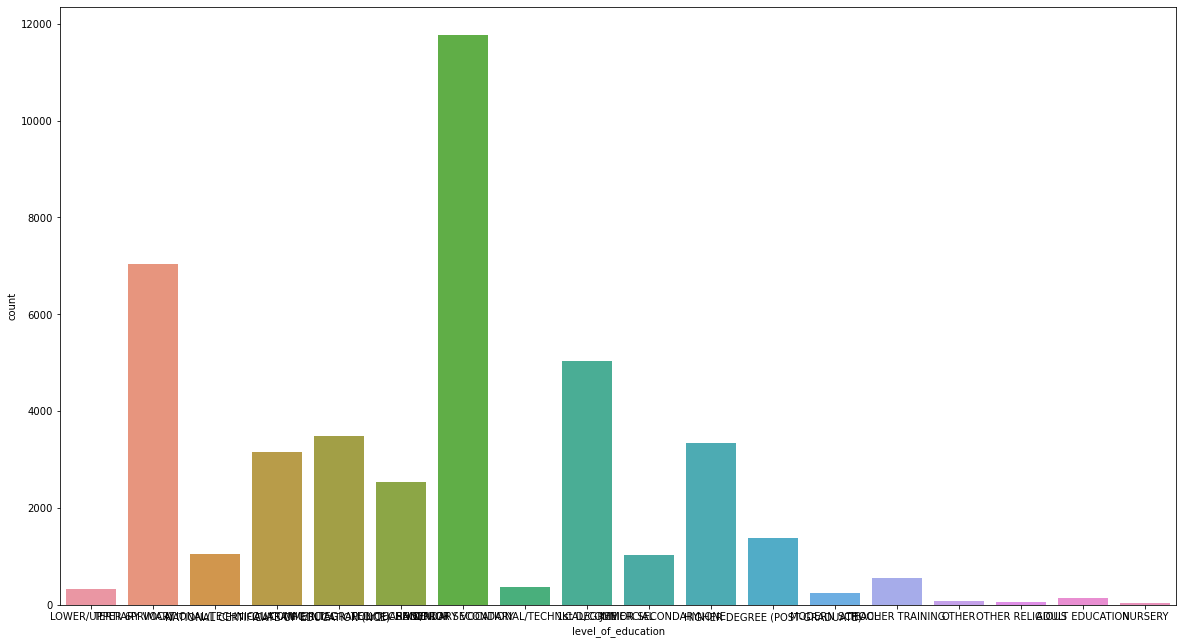

In [17]:
plt.figure(figsize = (20,11))
sns.countplot(x = 'level_of_education', data = data)
plt.show()

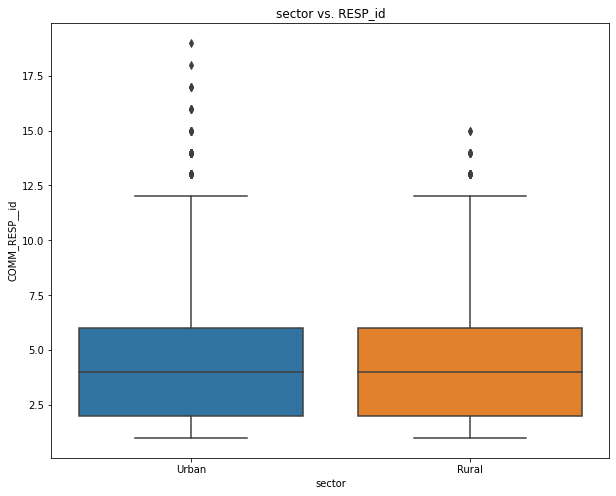

In [18]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'sector', y = 'COMM_RESP__id', data = data)
plt.title('sector vs. RESP_id')
plt.show()

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# 1. Encode categorical columns
categorical_cols = ['zone_id', 'state_id', 'sector', 'gender', 'level_of_education',
                    'phone_access', 'loan_source', 'collateral', 'women_access']

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Encode target variable 'creditworthy'
data['creditworthy'] = data['creditworthy'].map({'Yes': 1, 'No': 0})

# 2. Check and drop missing values (optional — handle as you wish)
data.dropna(inplace=True)

# 3. Undersample majority class
creditworthy_1 = data[data['creditworthy'] == 1]
creditworthy_0 = data[data['creditworthy'] == 0].sample(n=len(creditworthy_1), random_state=42)

balanced_data = pd.concat([creditworthy_1, creditworthy_0]).sample(frac=1, random_state=42)

# 4. Split features and target
X = balanced_data.drop(['creditworthy', 'COMID', 'COMM_RESP__id'], axis=1)
y = balanced_data['creditworthy']

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 6. Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}



# 7. Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(f"Accuracy is {accuracy_score(y_test, y_pred)}")
    print()
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Logistic Regression Performance:
Accuracy is 0.826890756302521

[[1593  485]
 [ 236 1851]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2078
           1       0.79      0.89      0.84      2087

    accuracy                           0.83      4165
   macro avg       0.83      0.83      0.83      4165
weighted avg       0.83      0.83      0.83      4165


Random Forest Performance:
Accuracy is 1.0

[[2078    0]
 [   0 2087]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2078
           1       1.00      1.00      1.00      2087

    accuracy                           1.00      4165
   macro avg       1.00      1.00      1.00      4165
weighted avg       1.00      1.00      1.00      4165



C:\Users\USER\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [21:56:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
Accuracy is 1.0

[[2078    0]
 [   0 2087]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2078
           1       1.00      1.00      1.00      2087

    accuracy                           1.00      4165
   macro avg       1.00      1.00      1.00      4165
weighted avg       1.00      1.00      1.00      4165



In [20]:
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)



# Random Forest
rf_report = classification_report(y_test, y_pred_rf, output_dict = True)
rf_df = pd.DataFrame(rf_report).transpose()

plt.figure(figsize=(10,6))
plt.table(cellText=rf_df.values, colLabels=rf_df.columns, rowLabels=rf_df.index, loc="center")
plt.axis("off")
plt.title("Random Forest Classification Report")
plt.savefig('rf_classification_report.png', bbox_inches='tight')

# Logistic Regression
lr_report = classification_report(y_test, y_pred_lr, output_dict = True)
lr_df = pd.DataFrame(lr_report).transpose()

plt.figure(figsize=(10,8))
plt.table(cellText=lr_df.values, colLabels=lr_df.columns, rowLabels=lr_df.index, loc="center")
plt.axis("off")
plt.title("Logistic Regression classification Report")
plt.savefig('rf_logistic Regression classification_report.png', bbox_inches='tight')


# XGBoost
xgb_report = classification_report(y_test, y_pred_xgb, output_dict = True)
xgb_df = pd.DataFrame(xgb_report).transpose()

plt.figure(figsize=(10,8))
plt.table(cellText=xgb_df.values, colLabels=xgb_df.columns, rowLabels=xgb_df.index, loc="center")
plt.axis("off")
plt.savefig('xgb_classification_report.png', bbox_inches='tight')

NameError: name 'rf_model' is not defined

In [ ]:
confusion_matrix = np.array([[4745,    1518],
       [ 691,    5540]])

confusion_matrix_percent = confusion_matrix / confusion_matrix.sum() * 100

labels = np.array([["{0}\n{1:.1f}%".format(value, percent)
                   for value, percent in zip(row, row_percent)]
                  for row, row_percent in zip(confusion_matrix, confusion_matrix_percent)])

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix_percent, annot=labels, fmt='', cmap='coolwarm', cbar_kws={'label': 'Percentage'})

# formatting
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix (in %)')
plt.show()

In [ ]:
confusion_matrix = np.array([[6263,    0],
       [ 0,    6231]])

confusion_matrix_percent = confusion_matrix / confusion_matrix.sum() * 100

labels = np.array([["{0}\n{1:.1f}%".format(value, percent)
                   for value, percent in zip(row, row_percent)]
                  for row, row_percent in zip(confusion_matrix, confusion_matrix_percent)])

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix_percent, annot=labels, fmt='', cmap='Blues', cbar_kws={'label': 'Percentage'})

# formatting
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (in %)')
plt.show()

In [ ]:
confusion_matrix = np.array([[6263,    0],
       [ 0,    6231]])

confusion_matrix_percent = confusion_matrix / confusion_matrix.sum() * 100

labels = np.array([["{0}\n{1:.1f}%".format(value, percent)
                   for value, percent in zip(row, row_percent)]
                  for row, row_percent in zip(confusion_matrix, confusion_matrix_percent)])

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix_percent, annot=labels, fmt='', cmap='viridis', cbar_kws={'label': 'Percentage'})

# formatting
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGB Confusion Matrix (in %)')
plt.show()